# Training Deep Q-Learning Agent

In [1]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dqn import QAgent

In [2]:
# define environment
env = gym.make('LunarLander-v2')

# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episodes = 10
batch_size = 64

# define and train agent
agent = QAgent(env)
returns = agent.training(env, batch_size, episodes)

env.close()

episode: 1/10, return: -110.07890232992042, epsilon: 0.98
episode: 2/10, return: -421.71600557607263, epsilon: 0.80
episode: 3/10, return: -138.54779632854164, epsilon: 0.63
episode: 4/10, return: -220.07504920612763, epsilon: 0.52
episode: 5/10, return: -65.2769069028968, epsilon: 0.41
episode: 6/10, return: -159.01280738739263, epsilon: 0.33
episode: 7/10, return: -685.1082218341096, epsilon: 0.24
episode: 8/10, return: -120.02893781803246, epsilon: 0.19
episode: 9/10, return: -90.04577655531345, epsilon: 0.10
episode: 10/10, return: -443.0900821419169, epsilon: 0.10


In [3]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 100 episodes: {np.mean(returns[-100:])}')

Average return: -245.29804860803242
Average return last 100 episodes: -245.29804860803242


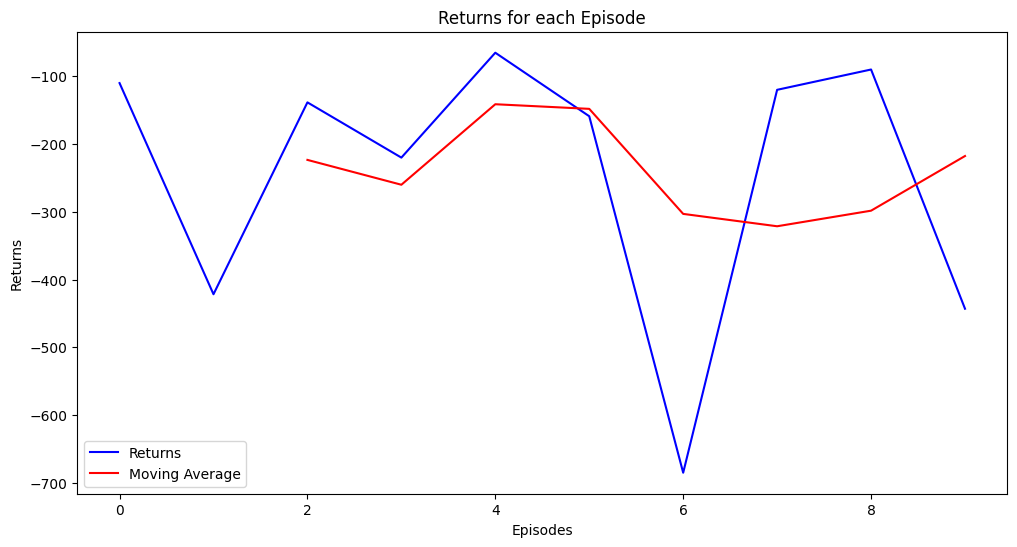

In [5]:
MA = pd.Series(returns).rolling(window=3).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=returns, label='Returns', color='blue')
sns.lineplot(data=MA, label='Moving Average', color='red')
plt.ylabel('Returns')
plt.xlabel('Episodes')
plt.title('Returns for each Episode')
plt.legend()
plt.show()